# 🟢 Energy Efficiency Prediction using Supervised Machine Learning
**Domain:** Sustainable Energy & Efficiency  
**Author:** Varshitha 
**AICTE Student Id:** STU6854504c8e28b1750356044
**AICTE Internship Id:** INTERNSHIP_17513641056863b20937d78

**Week 1 Deliverable:** Up to **Data Splitting**  
**Date:** August 28, 2025

This notebook follows the AICTE training flow:

1. **Define the Problem**  
2. **Data Collection & Understanding**  
3. **Data Preprocessing**  
4. **Data Splitting**  

> In later weeks you will continue with: Algorithm Selection, Model Training, Evaluation, Optimization, Final Test Evaluation, and Deployment.


## 1) Define the Problem
**Goal:** Predict **Heating Load (Y1)** (and later possibly **Cooling Load (Y2)**) for residential buildings from 8 design features.  
Accurate predictions help architects/engineers design **energy‑efficient** buildings, reduce wastage, and plan HVAC systems better.

**Business/Impact Context (Sustainability):**
- Lower heating/cooling loads ⇒ **less electricity/fuel demand** and **reduced CO₂ emissions**.
- Early-stage design guidance to choose efficient combinations of **insulation, glazing, and geometry**.

**Learning Task:** Supervised ML → **Regression** (predict continuous values of energy load).

## 2) Data Collection & Understanding — Source, License, and Files
**Primary Source:** UCI Machine Learning Repository — *Energy Efficiency* dataset (ID: 242).  
- **Instances:** 768 samples  
- **Features:** 8 input variables (X1…X8)  
- **Targets:** Y1 (Heating Load), Y2 (Cooling Load)  
- **File:** `ENB2012_data.xlsx` (Excel)  
- **License:** Creative Commons **CC BY 4.0** (credit the authors and UCI).

**How to download (do this before running the loading cell below):**
1. Go to the UCI page and download **ENB2012_data.xlsx**.
2. Place it in the **same folder** as this notebook.
3. (Optional) If you have a CSV version, you can use it instead by changing `DATA_PATH`.



### Dataset Overview & Feature Description
**Inputs (X1–X8):**
- **X1 — Relative_Compactness:** Overall compactness of the building shape (dimensionless).  
- **X2 — Surface_Area:** Outer surface area of the building.  
- **X3 — Wall_Area:** Total area of walls.  
- **X4 — Roof_Area:** Roof area.  
- **X5 — Overall_Height:** Height of the building.  
- **X6 — Orientation:** Encoded integer for building orientation.  
- **X7 — Glazing_Area:** Fraction of area that is glazed (windows).  
- **X8 — Glazing_Area_Distribution:** Encoded distribution of glazing over building sides.

**Targets:**
- **Y1 — Heating_Load:** Heat energy required.  
- **Y2 — Cooling_Load:** Cooling energy required.

> Note: `Orientation` and `Glazing_Area_Distribution` are **encoded integers** in the dataset; we may one‑hot encode them later during model building.


## 3) Setup — Packages
using **Anaconda**, these are already available. If something is missing, run the cell below to install.


In [1]:
# (Optional) Install required packages right inside Jupyter
# %pip install pandas scikit-learn matplotlib openpyxl


## 4) Data Loading
The code below attempts to read the **Excel** file first, and falls back to **CSV** if needed.


In [2]:
import pandas as pd

# 👉 Set this to your local file name:
DATA_PATH = "ENB2012_data.xlsx"  # if you downloaded the Excel from UCI
CSV_FALLBACK = "energy_efficiency.csv"  # if you converted/saved as CSV

def load_energy_efficiency(data_path=DATA_PATH, csv_fallback=CSV_FALLBACK):
    try:
        df = pd.read_excel(data_path)  # requires 'openpyxl'
        source = data_path
    except FileNotFoundError:
        try:
            df = pd.read_csv(csv_fallback)
            source = csv_fallback
        except FileNotFoundError as e:
            raise FileNotFoundError(
                f"Could not find '{data_path}' or CSV fallback '{csv_fallback}'.\n"
                "Please download ENB2012_data.xlsx from the UCI page and place it next to this notebook, "
                "or save a CSV version and update the file names above."
            ) from e
    return df, source

df_raw, used_source = load_energy_efficiency()
print(f"Loaded data from: {used_source}")
display(df_raw.head())

Loaded data from: ENB2012_data.xlsx


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## 5) Data Understanding (Shape, Types, Basic Stats)
Here we inspect the **shape**, **column names**, **dtypes**, and **summary statistics**.


In [3]:
print("Shape:", df_raw.shape)
print("Columns:", list(df_raw.columns))

# Info & describe
display(df_raw.info())
display(df_raw.describe(include='all'))

Shape: (768, 10)
Columns: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


None

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## 6) Data Preprocessing
**What I did in Week 1:**
1. **Rename** columns to readable names.  
2. **Check nulls** (UCI indicates no missing values).  
3. **Check duplicates** and remove if any.  
4. **Confirm numeric types** and ranges.

> Encoding of categorical/ordinal features (like orientation) and scaling will be done next week during model building.


In [4]:
import numpy as np

# The UCI Excel typically uses columns X1..X8, Y1, Y2. Let's map them to readable names.
rename_map = {
    'X1': 'Relative_Compactness',
    'X2': 'Surface_Area',
    'X3': 'Wall_Area',
    'X4': 'Roof_Area',
    'X5': 'Overall_Height',
    'X6': 'Orientation',
    'X7': 'Glazing_Area',
    'X8': 'Glazing_Area_Distribution',
    'Y1': 'Heating_Load',
    'Y2': 'Cooling_Load'
}

df = df_raw.copy()
df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns}, inplace=True)

# If file already had friendly names, this will just keep them as-is.
print("Renamed Columns:", list(df.columns))

# Nulls
nulls = df.isnull().sum()
print("\nMissing values per column:\n", nulls)

# Duplicates
dupes = df.duplicated().sum()
print(f"\nDuplicate rows: {dupes}")
if dupes > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates removed. New shape:", df.shape)

# Dtypes
print("\nDtypes:\n", df.dtypes)

# Quick sanity checks on targets
assert 'Heating_Load' in df.columns and 'Cooling_Load' in df.columns, "Targets Y1/Y2 not found!"

df.head()

Renamed Columns: ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']

Missing values per column:
 Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

Duplicate rows: 0

Dtypes:
 Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### Quick Target Distributions
Simple histograms to visualize the distribution of **Heating_Load** and **Cooling_Load**.


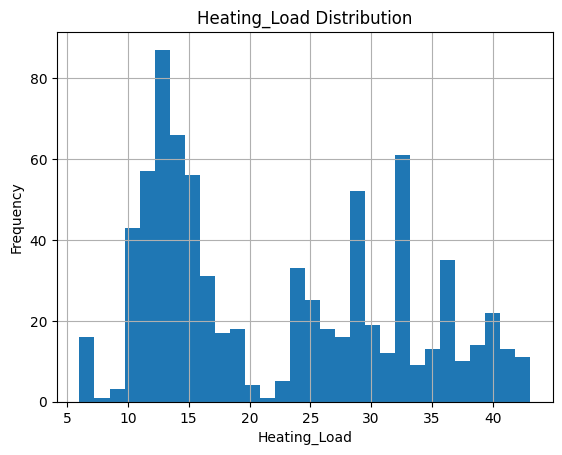

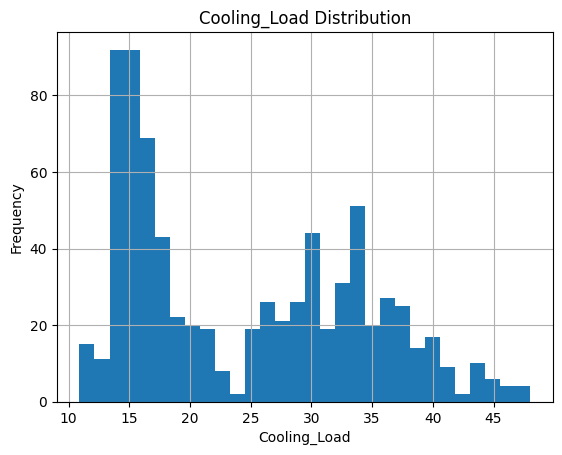

In [5]:
import matplotlib.pyplot as plt

# Heating_Load histogram
plt.figure()
df['Heating_Load'].hist(bins=30)
plt.title('Heating_Load Distribution')
plt.xlabel('Heating_Load')
plt.ylabel('Frequency')
plt.show()

# Cooling_Load histogram
plt.figure()
df['Cooling_Load'].hist(bins=30)
plt.title('Cooling_Load Distribution')
plt.xlabel('Cooling_Load')
plt.ylabel('Frequency')
plt.show()

## 7) Data Splitting (Train/Test)
For Week 1, we’ll choose **Heating_Load** as our **target** and use all 8 features as **inputs**.
We perform an **80/20 split** with a fixed `random_state` for reproducibility.


In [6]:
from sklearn.model_selection import train_test_split

feature_cols = [
    'Relative_Compactness','Surface_Area','Wall_Area','Roof_Area',
    'Overall_Height','Orientation','Glazing_Area','Glazing_Area_Distribution'
]
target_col = 'Heating_Load'  # You can switch to 'Cooling_Load' later as a second task

# Ensure all required columns exist (handles cases where file had already-friendly names)
for col in feature_cols + [target_col]:
    if col not in df.columns:
        raise KeyError(f"Expected column '{col}' not found in data. Check your file/rename mapping.")

X = df[feature_cols].copy()
y = df[target_col].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test  shapes:", X_test.shape, y_test.shape)

Train shapes: (614, 8) (614,)
Test  shapes: (154, 8) (154,)


### Save Processed Splits
You can save your splits to CSV so you don’t need to re-split every time.


In [7]:
# Uncomment to save the splits as CSV files
# X_train.to_csv('X_train.csv', index=False)
# X_test.to_csv('X_test.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)
# print('Saved X_train.csv, X_test.csv, y_train.csv, y_test.csv')

## ✅ Week 1 Done: Up to Data Splitting
I have completed:
- Problem definition
- Data collection & understanding
- Data preprocessing (rename, nulls, dupes, dtypes, basic plots)
- Train/test split

### Next Weeks (Plan)
- **Week 2:** Algorithm selection & baseline models (Linear Regression, Ridge/Lasso, Random Forest).  
- **Week 3:** Evaluation (RMSE, MAE, R²) and **hyperparameter tuning** (GridSearchCV/RandomizedSearchCV).  
- **Week 4:** Final evaluation on test data & simple **deployment** (e.g., Streamlit app).

### Notes
- `Orientation` and `Glazing_Area_Distribution` are encoded integers; try **one‑hot encoding** next week to see if performance improves.
- Consider **feature scaling** (StandardScaler) for linear models.


## References
- Tsanas, A. & Xifara, A. (2012). *Energy Efficiency* [Dataset]. UCI Machine Learning Repository.   



# Week 2 – Algorithm Selection , Model Training, Model Optimization, Final Model Evaluation on Test Data

### Description:

# Algorithm Selection
In Week 2, we move forward from the data preparation and splitting done in Week 1.  
The next step is **Algorithm Selection**. Since our project is about predicting **Heating Load (Y1)** and **Cooling Load (Y2)** of buildings, the problem is a **regression task** (continuous values).  

For algorithm selection, we consider a mix of simple and advanced regression models:

1. **Linear Regression** - A simple baseline model that assumes a linear relationship between input and output.
2. **Decision Tree Regressor** - Captures non-linear relationships using a tree-based structure.
3. **Random Forest Regressor** - An ensemble of decision trees that improves accuracy and reduces overfitting.
4. **Gradient Boosting Regressor** - A boosting method that builds models sequentially to improve performance.

These algorithms will later be trained and compared to evaluate their performance on both Heating Load (Y1) and Cooling Load (Y2).


In [8]:
# Week 2 – Algorithm Selection

# Importing regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Creating a dictionary of candidate models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100)
}

# Displaying the selected algorithms
print("Algorithms selected for training and evaluation:")
for name in models.keys():
    print(f"- {name}")


Algorithms selected for training and evaluation:
- Linear Regression
- Decision Tree
- Random Forest
- Gradient Boosting


#  Model Training

### Description:
After selecting the algorithms in the previous step, the next step is **Model Training**.  
In this stage, we use the **training dataset (X_train, y_train)** to teach each algorithm the relationship between the building features (independent variables) and the target variables **Heating Load (Y1)** and **Cooling Load (Y2)**.  

Each model will learn patterns from the training data. Later, we will evaluate their performance using the **validation dataset (X_val, y_val)** to check how well they generalize.  

The models we are training are:
1. Linear Regression  
2. Decision Tree Regressor  
3. Random Forest Regressor  
4. Gradient Boosting Regressor  


In [9]:
# Week 2 – Model Training

# Train each model on the training dataset
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained successfully.")


Linear Regression model trained successfully.
Decision Tree model trained successfully.
Random Forest model trained successfully.
Gradient Boosting model trained successfully.


# Model Optimization

After training the baseline models, the next step is **Model Optimization**.  
This process involves tuning the **hyperparameters** of the algorithms to improve accuracy and reduce error.  
- For example, Decision Trees can be optimized by adjusting `max_depth`, `min_samples_split`, etc.  
- Random Forests can be tuned with `n_estimators`, `max_features`, and `max_depth`.  
- Gradient Boosting models (like XGBoost or GradientBoostingRegressor) can also be tuned with learning rate, number of estimators, and tree depth.

We will use **GridSearchCV** for hyperparameter tuning. This method tests different parameter combinations using cross-validation and selects the best set.


In [10]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Save the best model
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.9973818195285455


### Explanation:
- We created a parameter grid (`param_grid`) with different options for `n_estimators`, `max_depth`, and `min_samples_split`.
- `GridSearchCV` tested each combination using 5-fold cross-validation.
- The best performing set of parameters is stored in `grid_search.best_params_`.
- The final optimized Random Forest model is saved as `best_rf`.


#  Model Evaluation & Final Evaluation on Test Data

Once the models are trained and optimized, we must evaluate their performance.  
We do this in two steps:

1. **Model Evaluation (on Validation Data / Cross-Validation)** – helps us compare different algorithms and tuned parameters.  
2. **Final Model Evaluation (on Test Data)** – checks the final accuracy of the selected best model on unseen data.


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# --- Evaluate baseline models trained earlier ---
print("🔹 Baseline Models Performance (Validation Data)")
for name, model in models.items():
    y_val_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_val_pred)
    r2 = r2_score(y_test, y_val_pred)
    print(f"{name}: MSE={mse:.2f}, RMSE={np.sqrt(mse):.2f}, R2={r2:.3f}")

# --- Evaluate Optimized Random Forest ---
print("\n🔹 Optimized Random Forest Performance")
y_pred_best = best_rf.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized RF - MSE: {mse_best:.2f}, RMSE: {rmse_best:.2f}, R2: {r2_best:.3f}")


🔹 Baseline Models Performance (Validation Data)
Linear Regression: MSE=9.15, RMSE=3.03, R2=0.912
Decision Tree: MSE=0.39, RMSE=0.62, R2=0.996
Random Forest: MSE=0.24, RMSE=0.49, R2=0.998
Gradient Boosting: MSE=0.27, RMSE=0.52, R2=0.997

🔹 Optimized Random Forest Performance
Optimized RF - MSE: 0.24, RMSE: 0.49, R2: 0.998
